# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

2
4
6

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

23 45
68


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

4
2
3
3
-3
9


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Writing input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Writing input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
%%writefile input3.txt
20

Overwriting input3.txt


In [ ]:
%%writefile random_stress_test.cpp
#include <iostream>
#include <cstdlib>
#include <ctime>

using namespace std;

int main() {
    int n;
    cin >> n; // If you want 20, put 20
    
    // Seed the random number generator
    srand(time(NULL));
    
    // Generate n random numbers and write them to the output file
    for (int i = 0; i < n; i++) {
        int num = rand() % 19 + 2;
        cout << num << endl;
    }

    return 0;
}


Writing random_stress_test.cpp


In [ ]:
!g++ random_stress_test.cpp -o random_stress_test
!./random_stress_test < input3.txt

2
18
2
16
16
2
19
7
18
13
9
20
14
7
8
12
18
13
8
7


### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000

real	1m34.474s
user	1m33.882s
sys	0m0.040s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Overwriting test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Overwriting max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [24]:
                                                  #Número de pasos
def max_pairwise_product(numbers):                #1
  n = len(numbers)                                #1
  numeroMasGrande = 0                             #1
  segundoNumeroMasGrande = 0                      #1
  for i in range(n):                              #n
    if(numbers[i] > numeroMasGrande):             #n+1
      segundoNumeroMasGrande = numeroMasGrande    #n
      numeroMasGrande = numbers[i]                #n
    elif(numbers[i] > segundoNumeroMasGrande):    #n
      segundoNumeroMasGrande = numbers[i]         #n
    else:                                         #1
      continue                                    #n
  return numeroMasGrande * segundoNumeroMasGrande #1
                                                  #------------------
                                          #TOTAL  4n+5
                                          #Compeljidad O(n)         

if __name__ == '__main__':
  _ = int(input())
  input_numbers = list(map(int, input().split()))
  print(max_pairwise_product(input_numbers))

4
4 5 8 3
40


Test with inputs 1 and 2

In [2]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Writing input1.txt


In [3]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Writing input2.txt


In [4]:
def main(file):
  with open(file, 'r') as f:
    lineas = [linea.split() for linea in f]
    for linea in lineas:
      for i in range(len(linea)):
        linea[i] = int(linea[i])
    print(max_pairwise_product(lineas[1]))

In [5]:
import time
inicio1 = time.time()
main('input1.txt')
fin1 = time.time()
print("Time input 1: ", fin1 - inicio1, "segundos")
inicio2 = time.time()
main('input2.txt')
fin2 = time.time()
print("Time input 2: ", fin2 - inicio2, "segundos")

90
Time input 1:  0.001043558120727539 segundos
40000000000
Time input 2:  0.0020487308502197266 segundos


Test and time it with input 3

In [18]:
import time
with open("input3.txt", "w") as fil:
    fil.write("200000\n")
    for i in range(1, 200001):
        fil.write(str(i) + " ")
inicio = time.time()
main('input3.txt')
fin = time.time()
print("Time: ", fin - inicio, "segundos")

39999800000
Time:  0.07573723793029785 segundos


20 stress tests

In [ ]:
import random
def brute_force_max_pairwise_product(numbers):
  n = len(numbers)
  max_product = 0
  for first in range(n):
    for second in range(first + 1, n):
      max_product = max(max_product,
        numbers[first] * numbers[second])
  return max_product
def stress_test(N, M):
    count = 0
    while count < 20:
        n = random.randint(2, N)
        A = [random.randint(0, M) for i in range(n)]
        print(A)
        result1 = brute_force_max_pairwise_product(A)
        result2 = max_pairwise_product(A)
        if result1 == result2:
            print("OK")
        else:
            print("Wrong answer:", result1, result2)
            return
        count += 1
stress_test(10, 1000000)

[785674, 555426, 217817]
OK
[441349, 754834, 666885, 136954, 763983]
OK
[39452, 784168, 316009, 651828, 255189, 908183, 980482, 128919]
OK
[436004, 29870, 687783, 442223, 721880, 852166, 485027, 729340, 484232]
OK
[206991, 929987, 58370, 419909]
OK
[761550, 243988, 60588, 566048, 31201, 483222, 933165, 400029]
OK
[570201, 595028, 15771]
OK
[520421, 341419, 150779, 377635, 216687, 188539, 425624, 983169, 776358]
OK
[984700, 272717, 348557, 557607, 47973, 815019]
OK
[851600, 801034, 535599, 687961]
OK
[275283, 201133, 85585, 818264, 230931, 719096, 27614, 282504]
OK
[622260, 889744, 662509]
OK
[831655, 974831, 551178]
OK
[292306, 714996, 131752, 591172, 817392, 655837, 671025, 880423, 380170, 981971]
OK
[792029, 815870, 915502, 200651, 296989, 434135, 126991, 993258, 922023]
OK
[273239, 189029, 565816, 942464]
OK
[610345, 72185, 491748, 759539, 925975, 315741, 728881, 997864]
OK
[166117, 711090]
OK
[958049, 903226, 846308, 400285, 276047, 129647, 79978, 511085]
OK
[897826, 133265]
OK


Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
def main_2(file):
  with open(file, 'r') as f:
    lineas = [linea.split() for linea in f]
  return len(lineas[1])
def num_instrucciones(n):
    return 4*n + 5

a = main_2('input1.txt')
num_instrucciones_input1 = num_instrucciones(a)
print(num_instrucciones_input1)
b = main_2('input2.txt')
num_instrucciones_input2 = num_instrucciones(b)
print(num_instrucciones_input2)
c = main_2('input3.txt')
num_instrucciones_input3 = num_instrucciones(c)
print(num_instrucciones_input3)

45
29
800005


Calculate estimated time by instruction and number of instructions by second

In [6]:
instrucciones_por_segundo = 45/0.001043558120727539
tiempo_por_instruccion = 1/instrucciones_por_segundo
print("Instrucciones por segundo para input 1:",instrucciones_por_segundo)
print("Tiempo por cada instruccion para input 1:",tiempo_por_instruccion)

Instrucciones por segundo para input 1: 43121.69979437971
Tiempo por cada instruccion para input 1: 2.319018046061198e-05


In [7]:
instrucciones_por_segundo = 29/0.0020487308502197266
tiempo_por_instruccion = 1/instrucciones_por_segundo
print("Instrucciones por segundo para input 2:",instrucciones_por_segundo)
print("Tiempo por cada instruccion para input 2:",tiempo_por_instruccion)

Instrucciones por segundo para input 2: 14155.104852787152
Tiempo por cada instruccion para input 2: 7.064589138688713e-05


In [8]:
instrucciones_por_segundo = 800005/0.08369064331054688
tiempo_por_instruccion = 1/instrucciones_por_segundo
print("Instrucciones por segundo para input 3:",instrucciones_por_segundo)
print("Tiempo por cada instruccion para input 3:",tiempo_por_instruccion)

Instrucciones por segundo para input 3: 9559073.372532932
Tiempo por cada instruccion para input 3: 1.0461265030911917e-07


### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [14]:
%load_ext Cython

In [15]:
def py_read_file(filename):
    with open(filename, "r") as f:
        return f.read()

Test with inputs 1 and 2


 

In [16]:
if __name__ == '__main__':
    # Leer el archivo de entrada
    with open("input1.txt", "r") as f:
        contenido = f.read().strip().split() #O(1)

    # Convertir el primer elemento en entero
    n = int(contenido[0]) #O(1)

    # Convertir el resto de los elementos en una lista de enteros
    mapeado = [int(x) for x in contenido[1:]] #O(N)

    # Inicializar los máximos
    maximo1 = maximo2 = -1 #O(1)

    # Encontrar los dos máximos
    for numero_actual in mapeado: #O(N)
        if numero_actual > maximo1: #O(N)
            maximo2 = maximo1 #O(n)
            maximo1 = numero_actual #O(n)
        elif numero_actual > maximo2: #O(N)
            maximo2 = numero_actual #O(n)

    # Imprimir el producto de los dos máximos
    print('Input 1: ', maximo1 * maximo2) #O(1)


Input 1:  90


In [9]:
if __name__ == '__main__':
    with open("input2.txt") as f: # O(1)
        contenido = f.read().strip().split() # O(n)

    mapeado = [int(x) for x in contenido[1:]] # O(n)

    maximo1 = maximo2 = -1 # O(1)

    for numero_actual in mapeado: # O(n)
        if numero_actual > maximo1: # O(1)
            maximo2 = maximo1 # O(1)
            maximo1 = numero_actual # O(1)
        elif numero_actual > maximo2: # O(1)
            maximo2 = numero_actual # O(1)

    print(maximo1 * maximo2) # O(1)

40000000000


Test and time it with input 3

In [19]:
if __name__ == '__main__':
    with open("input3.txt") as f:
        scan = f.read().split()

    mapeado = map(int, scan[1:]) #O(1)

    maximo1 = maximo2 = -1 #O(1) 

    for numero_actual in mapeado: #O(n)
        if maximo1 == -1: #O(n)
            maximo1 = numero_actual #O(n)
        
        elif numero_actual > maximo1: #O(n)
            bandera = maximo1 #O(n)
            maximo1 = numero_actual #O(n)
            maximo2 = bandera #O(n)
        
        elif (numero_actual == -1) or (numero_actual > maximo2): #O(n)
            maximo2 = numero_actual #O(n)

    print(maximo1*maximo2) #O(1)

39999800000


20 stress tests 

In [10]:
from random import randint

if __name__ == '__main__':

    for i in range(20):# O(1)
        n = randint(2, 10)  # O(1)
        numeros = []  # O(1)
        maximo1 = -1  # O(1)
        maximo2 = -1  # O(1)

        for j in range(n):# O(n)
            actual_num = randint(1, 200000)  # O(1)
            print(actual_num, end=" ")  # O(1)
            numeros.append(actual_num)  # O(1)

            if actual_num > maximo1:  # O(1)
                maximo2 = maximo1  # O(1)
                maximo1 = actual_num  # O(1)
            elif actual_num > maximo2:  # O(1)
                maximo2 = actual_num  # O(1)

        indice_max1 = -1  # O(1)
        for i in range(n):
            if indice_max1 == -1 or numeros[i] > numeros[indice_max1]:  # O(n)
                indice_max1 = i  # O(1)

        indice_max2 = -1  # O(1)
        for i in range(n):
            if i != indice_max1 and (indice_max2 == -1 or numeros[i] > numeros[indice_max2]):  # O(n)
                indice_max2 = i  # O(1)

        res1 = numeros[indice_max1] * numeros[indice_max2]  # O(1)
        res2 = maximo1 * maximo2  # O(1)

        if res1 != res2:  # O(1)
            print("Respuestas incorrectas:", res1, res2, "\n")  # O(1)
            break  # O(1)
        else:
            print("OK \n")  # O(1)

96682 47417 39997 129038 OK 

175507 83806 49642 194006 193395 52930 45047 OK 

174147 91334 48838 111283 44362 85263 72274 126590 OK 

29454 139046 142325 114716 190917 152779 109780 123218 184835 OK 

174437 61906 9860 129662 113783 125382 186544 OK 

36066 29841 161906 67147 66247 49519 75653 OK 

157654 178444 152598 OK 

149699 40259 120934 19191 124194 32087 7804 52091 37720 153704 OK 

196555 98838 87143 91419 162956 OK 

143687 140608 157071 152270 96693 171550 40677 818 37056 OK 

131045 121789 OK 

199318 43066 18913 53361 187746 101166 OK 

182443 138597 176239 163746 96173 40886 OK 

99943 141688 162443 47633 OK 

167936 156210 187471 175936 124084 OK 

56799 69116 65551 63839 90754 61461 12745 146344 OK 

6489 38020 12685 73675 OK 

187432 197098 22408 104136 198492 102177 47284 135963 25519 OK 

193889 47253 116673 40830 31996 56309 107768 114231 OK 

41970 57397 74427 159689 109779 482 71862 OK 



Count executed instructions in code and verify with inputs 1,2 and 3

In [11]:
import time

if __name__ == '__main__':
    start_time = time.time()
    with open("input1.txt", "r") as f:  # O(1)
        contenido = f.read().strip().split()# O(n)
        contador = 1  

    mapeado = [int(x) for x in contenido[1:]] # O(n)
    contador += len(mapeado) + 1  

    maximo1 = maximo2 = -1 # O(1)
    contador += 2 

    for numero_actual in mapeado:# O(n)
        contador += 1  

        if numero_actual > maximo1:# O(1)
            maximo2 = maximo1# O(1)
            maximo1 = numero_actual# O(1)
            contador += 4  
        elif numero_actual > maximo2:# O(1)
            maximo2 = numero_actual# O(1)
            contador += 2  

    print(maximo1 * maximo2)# O(1)
    contador += 1

    print("Número total de pasos input 1:", contador)
    print("Tiempo de ejecución input 1: %s segundos" % (time.time() - start_time))

90
Número total de pasos input 1: 65
Tiempo de ejecución input 1: 0.0014195442199707031 segundos


In [12]:
import time

if __name__ == '__main__':
    start_time = time.time()
    steps = 0

    with open("input2.txt") as f: # O(1)
        contenido = f.read().strip().split() # O(n)
        steps += 1 + len(contenido)

    mapeado = [int(x) for x in contenido[1:]] # O(n)
    steps += len(mapeado)

    maximo1 = maximo2 = -1 # O(1)
    steps += 3

    for numero_actual in mapeado: # O(n)
        steps += 1

        if numero_actual > maximo1: # O(1)
            maximo2 = maximo1 # O(1)
            maximo1 = numero_actual # O(1)
            steps += 3
        elif numero_actual > maximo2: # O(1)
            maximo2 = numero_actual # O(1)
            steps += 2

    print(maximo1 * maximo2) # O(1)
    steps += 1

    print("Número de pasos input 2:", steps)
    print("Tiempo de ejecución input 2: %s segundos" % (time.time() - start_time))

40000000000
Número de pasos input 2: 37
Tiempo de ejecución input 2: 0.004892826080322266 segundos


In [20]:
import time

if __name__ == '__main__':
    start_time = time.time()
    steps = 0

    with open("input3.txt") as f: # O(1)
        contenido = f.read().strip().split() # O(n)
        steps += 1 + len(contenido)

    mapeado = [int(x) for x in contenido[1:]] # O(n)
    steps += len(mapeado)

    maximo1 = maximo2 = -1 # O(1)
    steps += 2

    for numero_actual in mapeado: # O(n)
        steps += 1

        if maximo1 == -1: # O(1)
            maximo1 = numero_actual
            steps += 1

        elif numero_actual > maximo1: # O(1)
            bandera = maximo1 # O(1)
            maximo1 = numero_actual # O(1)
            maximo2 = bandera # O(1)
            steps += 4

        elif (numero_actual == -1) or (numero_actual > maximo2): # O(1)
            maximo2 = numero_actual # O(1)
            steps += 2

    print(maximo1*maximo2) # O(1)
    steps += 1

    print("Número de pasos input 3:", steps)
    print("Tiempo de ejecución input 3: %s segundos" % (time.time() - start_time))

39999800000
Número de pasos input 3: 1400002
Tiempo de ejecución input 3: 0.125901460647583 segundos


Calculate estimated time by instruction and number of instructions by second

In [21]:
instrucciones_por_segundo = 65/0.005961894989013672
tiempo_por_instruccion = 1 / instrucciones_por_segundo

print("Instrucciones por segundo input 1:",instrucciones_por_segundo)
print("Tiempo por cada instruccion input 1:",tiempo_por_instruccion)

Instrucciones por segundo input 1: 10902.57378229225
Tiempo por cada instruccion input 1: 9.172146136944112e-05


In [22]:
instrucciones_por_segundo = 37/0.0019478797912597656
tiempo_por_instruccion = 1 / instrucciones_por_segundo

print("Instrucciones por segundo input 2:",instrucciones_por_segundo)
print("Tiempo por cada instruccion input 2:",tiempo_por_instruccion)

Instrucciones por segundo input 2: 18995.01199510404
Tiempo por cada instruccion input 2: 5.264539976377745e-05


In [23]:
instrucciones_por_segundo = 1400002/0.14876842498779297
tiempo_por_instruccion = 1 / instrucciones_por_segundo

print("Instrucciones por segundo input 3:",instrucciones_por_segundo)
print("Tiempo por cada instruccion input 3:",tiempo_por_instruccion)

Instrucciones por segundo input 3: 9410612.501375044
Tiempo por cada instruccion input 3: 1.0626300890126798e-07


# Codeforces problem https://codeforces.com/contest/1619/problem/A 

Solve the problem in Colab, submit the solution to Codeforces and add a screenshoot of the submission.

The problem was solve with the following code:

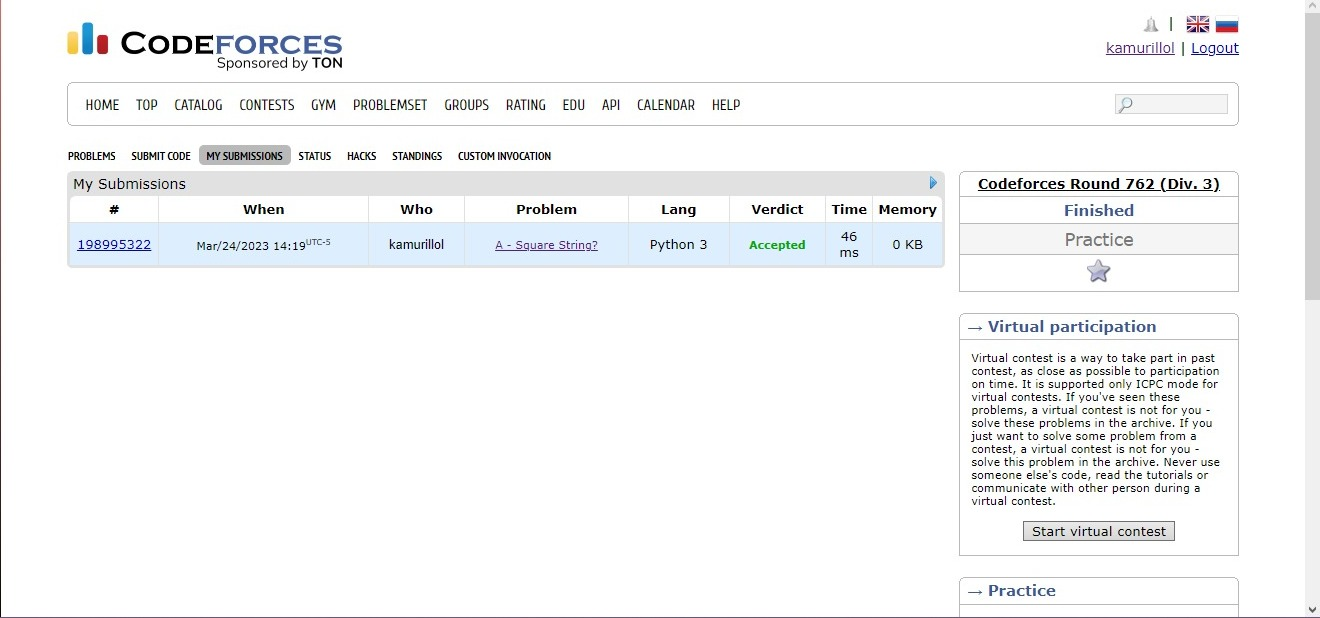

In [ ]:
t = int(input())  # read the number of test cases

for _ in range(t):  # iterate over each test case
    s = input().strip()  # read the string and remove any leading/trailing whitespaces
    n = len(s)  # find the length of the string

    if n % 2 != 0:  # if the length is odd, the string cannot be square
        print("NO")
    else:
        half = n // 2  # find the midpoint of the string
        if s[:half] == s[half:]:  # check if the first half of the string is the same as the second half
            print("YES")
        else:
            print("NO")

10
a
NO
aa
YES
aaa
NO
aaaa
YES
abab
YES
abcabc
YES
abacaba
NO
xxyy
NO
xyyx
NO
xyxy
YES
